In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import fastf1 as f1
from fastf1 import plotting
from ing_theme_matplotlib import mpl_style
import mplcyberpunk

In [3]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

*Qualifying*

In [3]:
quali = f1.get_session(2025, "Monaco", "Qualifying")
quali.load()

req         WARNING 	DEFAULT CACHE ENABLED! (1.33 GB) /home/sohamdesai/.cache/fastf1


core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.4.4]


req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info


core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)


req            INFO 	Using cached data for session_status_data


req            INFO 	Using cached data for track_status_data


req            INFO 	Using cached data for _extended_timing_data


req            INFO 	Using cached data for timing_app_data


core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data


req            INFO 	Using cached data for position_data


req            INFO 	Using cached data for weather_data


req            INFO 	Using cached data for race_control_messages


core           INFO 	Finished loading data for 20 drivers: ['4', '16', '81', '44', '1', '6', '14', '31', '30', '23', '55', '22', '27', '63', '12', '5', '87', '10', '18', '43']


In [4]:
quali.session_info

{'Meeting': {'Key': 1261,
  'Name': 'Monaco Grand Prix',
  'OfficialName': 'FORMULA 1 TAG HEUER GRAND PRIX DE MONACO 2025',
  'Location': 'Monaco',
  'Number': 8,
  'Country': {'Key': 114, 'Code': 'MON', 'Name': 'Monaco'},
  'Circuit': {'Key': 22, 'ShortName': 'Monte Carlo'}},
 'SessionStatus': 'Inactive',
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9975,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2025, 5, 24, 16, 0),
 'EndDate': datetime.datetime(2025, 5, 24, 17, 0),
 'GmtOffset': datetime.timedelta(seconds=7200),
 'Path': '2025/2025-05-25_Monaco_Grand_Prix/2025-05-24_Qualifying/'}

In [5]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
4,NOR,McLaren,NaN,1.0,NaT,
16,LEC,Ferrari,NaN,2.0,NaT,
81,PIA,McLaren,NaN,3.0,NaT,
44,HAM,Ferrari,NaN,4.0,NaT,
1,VER,Red Bull Racing,NaN,5.0,NaT,
6,HAD,Racing Bulls,NaN,6.0,NaT,
14,ALO,Aston Martin,NaN,7.0,NaT,
31,OCO,Haas F1 Team,NaN,8.0,NaT,
30,LAW,Racing Bulls,NaN,9.0,NaT,
23,ALB,Williams,NaN,10.0,NaT,


In [6]:
quali_laps = quali.laps
quali_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:18:20.848000,LEC,16,0 days 00:01:49.840000,1.0,1.0,0 days 00:16:32.017000,NaT,0 days 00:00:35.306000,0 days 00:00:45.933000,...,True,Ferrari,0 days 00:16:32.017000,2025-05-24 14:01:33.138,1,NaN,False,,False,False
1,0 days 00:19:33.911000,LEC,16,0 days 00:01:13.063000,2.0,1.0,NaT,NaT,0 days 00:00:19.203000,0 days 00:00:34.568000,...,True,Ferrari,0 days 00:18:20.848000,2025-05-24 14:03:21.969,1,NaN,False,,False,True
2,0 days 00:21:13.966000,LEC,16,0 days 00:01:40.055000,3.0,1.0,NaT,NaT,0 days 00:00:27.316000,0 days 00:00:46.768000,...,True,Ferrari,0 days 00:19:33.911000,2025-05-24 14:04:35.032,1,NaN,False,,False,True
3,0 days 00:22:26.057000,LEC,16,0 days 00:01:12.091000,4.0,1.0,NaT,NaT,0 days 00:00:18.869000,0 days 00:00:34.134000,...,True,Ferrari,0 days 00:21:13.966000,2025-05-24 14:06:15.087,1,NaN,False,,False,True
4,0 days 00:24:06.192000,LEC,16,0 days 00:01:40.135000,5.0,1.0,NaT,NaT,0 days 00:00:27.317000,0 days 00:00:50.120000,...,True,Ferrari,0 days 00:22:26.057000,2025-05-24 14:07:27.178,1,NaN,True,TRACK LIMITS AT TURN 10 LAP 6,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0 days 00:28:52.555000,COL,43,0 days 00:01:44.643000,8.0,2.0,0 days 00:27:09.545000,NaT,0 days 00:00:38.776000,0 days 00:00:38.634000,...,True,Alpine,0 days 00:27:07.912000,2025-05-24 14:12:09.033,1,NaN,False,,False,False
429,0 days 00:30:05.370000,COL,43,0 days 00:01:12.815000,9.0,2.0,NaT,NaT,0 days 00:00:18.824000,0 days 00:00:34.803000,...,True,Alpine,0 days 00:28:52.555000,2025-05-24 14:13:53.676,1,NaN,False,,False,True
430,0 days 00:31:41.736000,COL,43,0 days 00:01:36.366000,10.0,2.0,NaT,NaT,0 days 00:00:26.370000,0 days 00:00:44.941000,...,True,Alpine,0 days 00:30:05.370000,2025-05-24 14:15:06.491,1,NaN,False,,False,True
431,0 days 00:32:54.333000,COL,43,0 days 00:01:12.597000,11.0,2.0,NaT,NaT,0 days 00:00:18.756000,0 days 00:00:34.535000,...,True,Alpine,0 days 00:31:41.736000,2025-05-24 14:16:42.857,1,NaN,False,,False,True


In [7]:
nor_quali_laps = quali.laps.pick_driver("NOR")
fastest_lap_nor_quali = nor_quali_laps.pick_fastest().LapTime
nor_quali_lap_time = nor_quali_laps["LapTime"]
nor_quali_sec1 = nor_quali_laps["Sector1Time"]
nor_quali_sec2 = nor_quali_laps["Sector2Time"]
nor_quali_sec3 = nor_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_nor_quali), "which was in Lap number" ,nor_quali_laps.pick_fastest().LapNumber)
nor_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:09.954000 which was in Lap number 26.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
48,0 days 00:01:47.078000,0 days 00:00:26.421000,0 days 00:00:47.431000,0 days 00:00:33.226000,156.0,184.0,269.0,242.0
49,0 days 00:01:12.860000,0 days 00:00:19.256000,0 days 00:00:34.544000,0 days 00:00:19.060000,214.0,196.0,271.0,280.0
50,0 days 00:01:39.170000,0 days 00:00:25.163000,0 days 00:00:47.396000,0 days 00:00:26.611000,111.0,163.0,270.0,243.0
51,0 days 00:01:11.596000,0 days 00:00:18.806000,0 days 00:00:33.840000,0 days 00:00:18.950000,217.0,205.0,270.0,280.0
52,0 days 00:01:33.901000,0 days 00:00:25.155000,0 days 00:00:46.054000,0 days 00:00:22.692000,63.0,148.0,268.0,215.0


In [8]:
fastest_lap_nor_quali = nor_quali_laps.pick_fastest()
tele_nor_quali = fastest_lap_nor_quali.get_telemetry().add_distance()
speed_nor_quali = tele_nor_quali.Speed
tele_nor_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,280,7,11187
3,281,7,11223
4,283,7,11294
5,284,7,11334
6,285,7,11374
...,...,...,...
518,268,7,10797
519,270,7,10887
520,273,7,10978
521,277,7,11175


In [9]:
lec_quali_laps = quali.laps.pick_driver("LEC")
fastest_lap_lec_quali = lec_quali_laps.pick_fastest().LapTime
lec_quali_lap_time = lec_quali_laps["LapTime"]
lec_quali_sec1 = lec_quali_laps["Sector1Time"]
lec_quali_sec2 = lec_quali_laps["Sector2Time"]
lec_quali_sec3 = lec_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_lec_quali), "which was in Lap number" ,lec_quali_laps.pick_fastest().LapNumber)
lec_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:10.063000 which was in Lap number 26.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,0 days 00:01:49.840000,0 days 00:00:35.306000,0 days 00:00:45.933000,0 days 00:00:28.601000,97.0,167.0,269.0,262.0
1,0 days 00:01:13.063000,0 days 00:00:19.203000,0 days 00:00:34.568000,0 days 00:00:19.292000,213.0,201.0,268.0,281.0
2,0 days 00:01:40.055000,0 days 00:00:27.316000,0 days 00:00:46.768000,0 days 00:00:25.971000,111.0,145.0,270.0,242.0
3,0 days 00:01:12.091000,0 days 00:00:18.869000,0 days 00:00:34.134000,0 days 00:00:19.088000,219.0,205.0,268.0,281.0
4,0 days 00:01:40.135000,0 days 00:00:27.317000,0 days 00:00:50.120000,0 days 00:00:22.698000,83.0,151.0,269.0,212.0


In [10]:
fastest_lap_lec_quali = lec_quali_laps.pick_fastest()
tele_lec_quali = fastest_lap_lec_quali.get_telemetry().add_distance()
speed_lec_quali = tele_lec_quali.Speed
tele_lec_quali.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,279,7,11185
3,280,7,11200
4,281,7,11263
5,283,7,11326
6,284,7,11401
...,...,...,...
528,271,7,10820
529,271,7,10894
530,271,7,10969
531,275,7,11032


In [11]:
ver_quali_laps = quali.laps.pick_driver("VER")
fastest_lap_ver_quali = ver_quali_laps.pick_fastest().LapTime
ver_quali_lap_time = ver_quali_laps["LapTime"]
ver_quali_sec1 = ver_quali_laps["Sector1Time"]
ver_quali_sec2 = ver_quali_laps["Sector2Time"]
ver_quali_sec3 = ver_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_quali), "which was in Lap number" ,ver_quali_laps.pick_fastest().LapNumber)
ver_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:10.669000 which was in Lap number 17.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
27,0 days 00:01:29.639000,0 days 00:00:24.886000,0 days 00:00:38.571000,0 days 00:00:26.182000,193.0,187.0,268.0,266.0
28,0 days 00:01:11.920000,0 days 00:00:18.850000,0 days 00:00:34.108000,0 days 00:00:18.962000,217.0,203.0,267.0,279.0
29,0 days 00:01:40.015000,0 days 00:00:33.042000,0 days 00:00:41.129000,0 days 00:00:25.844000,164.0,149.0,265.0,221.0
30,0 days 00:01:11.814000,0 days 00:00:18.582000,0 days 00:00:34.071000,0 days 00:00:19.161000,222.0,204.0,268.0,280.0
31,NaT,0 days 00:00:25.926000,0 days 00:00:45.572000,0 days 00:01:39.438000,94.0,153.0,NaN,214.0


In [12]:
fastest_lap_ver_quali = ver_quali_laps.pick_fastest()
tele_ver_quali = fastest_lap_ver_quali.get_telemetry().add_distance()
speed_ver_quali = tele_ver_quali.Speed
tele_ver_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,275,7,10969
3,276,7,11018
4,277,7,11116
5,278,7,11145
6,280,7,11175
...,...,...,...
522,264,6,11172
523,267,6,10972
524,270,7,10772
525,272,7,10791


In [13]:
had_quali_laps = quali.laps.pick_driver("HAD")
fastest_lap_had_quali = had_quali_laps.pick_fastest().LapTime
had_quali_lap_time = had_quali_laps["LapTime"]
had_quali_sec1 = had_quali_laps["Sector1Time"]
had_quali_sec2 = had_quali_laps["Sector2Time"]
had_quali_sec3 = had_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_had_quali), "which was in Lap number" ,had_quali_laps.pick_fastest().LapNumber)
had_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:10.923000 which was in Lap number 26.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
349,0 days 00:01:36.573000,0 days 00:00:33.747000,0 days 00:00:40.726000,0 days 00:00:22.100000,168.0,170.0,239.0,261.0
350,0 days 00:01:20.320000,0 days 00:00:20.776000,0 days 00:00:37.030000,0 days 00:00:22.514000,193.0,187.0,269.0,262.0
351,0 days 00:01:13.217000,0 days 00:00:19.054000,0 days 00:00:34.578000,0 days 00:00:19.585000,217.0,198.0,268.0,279.0
352,0 days 00:01:46.744000,0 days 00:00:29.642000,0 days 00:00:47.067000,0 days 00:00:30.035000,75.0,136.0,270.0,238.0
353,0 days 00:01:12.625000,0 days 00:00:18.847000,0 days 00:00:34.403000,0 days 00:00:19.375000,217.0,201.0,269.0,280.0


In [14]:
fastest_lap_had_quali = had_quali_laps.pick_fastest()
tele_had_quali = fastest_lap_had_quali.get_telemetry().add_distance()
speed_had_quali = tele_had_quali.Speed
tele_had_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,277,7,11034
3,278,7,11075
4,280,7,11156
5,281,7,11200
6,283,7,11244
...,...,...,...
533,271,7,10785
534,272,7,10850
535,274,7,10916
536,276,7,11013


In [15]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_quali_sec1),
        "Sector1Time": nor_quali_sec1,
        "Sector2Time": nor_quali_sec2,
        "Sector3Time": nor_quali_sec3,
        "Lap Time": nor_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_quali_sec1),
        "Sector1Time": lec_quali_sec1,
        "Sector2Time": lec_quali_sec2,
        "Sector3Time": lec_quali_sec3,
        "Lap Time": lec_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Isack Hadjar"] * len(had_quali_sec1),
        "Sector1Time": had_quali_sec1,
        "Sector2Time": had_quali_sec2,
        "Sector3Time": had_quali_sec3,
        "Lap Time": had_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
0,Lando Norris,0 days 00:00:26.421000,0 days 00:00:47.431000,0 days 00:00:33.226000,0 days 00:01:47.078000
1,Lando Norris,0 days 00:00:19.256000,0 days 00:00:34.544000,0 days 00:00:19.060000,0 days 00:01:12.860000
2,Lando Norris,0 days 00:00:25.163000,0 days 00:00:47.396000,0 days 00:00:26.611000,0 days 00:01:39.170000
3,Lando Norris,0 days 00:00:18.806000,0 days 00:00:33.840000,0 days 00:00:18.950000,0 days 00:01:11.596000
4,Lando Norris,0 days 00:00:25.155000,0 days 00:00:46.054000,0 days 00:00:22.692000,0 days 00:01:33.901000
...,...,...,...,...,...
94,Isack Hadjar,0 days 00:00:18.434000,0 days 00:00:33.770000,0 days 00:00:18.836000,0 days 00:01:11.040000
96,Isack Hadjar,0 days 00:00:33.012000,0 days 00:00:39.560000,0 days 00:00:23.077000,0 days 00:01:35.649000
97,Isack Hadjar,0 days 00:00:18.514000,0 days 00:00:34.471000,0 days 00:00:19.089000,0 days 00:01:12.074000
99,Isack Hadjar,0 days 00:00:34.826000,0 days 00:00:39.357000,0 days 00:00:25.717000,0 days 00:01:39.900000


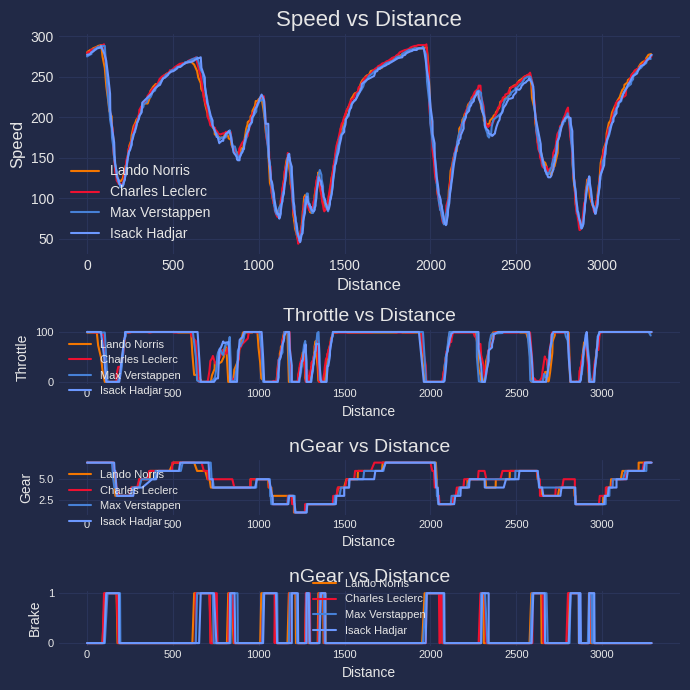

In [16]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_nor_quali.Distance, tele_nor_quali.Speed, label="Lando Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_lec_quali.Distance, tele_lec_quali.Speed, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[0].plot(
    tele_ver_quali.Distance, tele_ver_quali.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_had_quali.Distance, tele_had_quali.Speed, label="Isack Hadjar", color=get_driver_color("HAD")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_nor_quali.Distance, tele_nor_quali.Throttle, label="Lando Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_lec_quali.Distance, tele_lec_quali.Throttle, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[1].plot(
    tele_ver_quali.Distance, tele_ver_quali.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_had_quali.Distance, tele_had_quali.Throttle, label="Isack Hadjar", color=get_driver_color("HAD")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_nor_quali.Distance, tele_nor_quali.nGear, label="Lando Norris", color=get_driver_color("NOR")
)
ax[2].plot(
    tele_lec_quali.Distance, tele_lec_quali.nGear, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[2].plot(
    tele_ver_quali.Distance, tele_ver_quali.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_had_quali.Distance, tele_had_quali.nGear, label="Isack Hadjar", color=get_driver_color("HAD")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_nor_quali.Distance, tele_nor_quali.Brake, label="Lando Norris", color=get_driver_color("NOR")
)
ax[3].plot(
    tele_lec_quali.Distance, tele_lec_quali.Brake, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[3].plot(
    tele_ver_quali.Distance, tele_ver_quali.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_had_quali.Distance, tele_had_quali.Brake, label="Isack Hadjar", color=get_driver_color("HAD")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [17]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_quali_sec1),
        "Sector1Time": nor_quali_sec1,
        "Sector2Time": nor_quali_sec2,
        "Sector3Time": nor_quali_sec3,
        "Lap Time": nor_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_quali_sec1),
        "Sector1Time": lec_quali_sec1,
        "Sector2Time": lec_quali_sec2,
        "Sector3Time": lec_quali_sec3,
        "Lap Time": lec_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Isack Hadjar"] * len(had_quali_sec1),
        "Sector1Time": had_quali_sec1,
        "Sector2Time": had_quali_sec2,
        "Sector3Time": had_quali_sec3,
        "Lap Time": had_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
0,Lando Norris,0 days 00:00:26.421000,0 days 00:00:47.431000,0 days 00:00:33.226000,0 days 00:01:47.078000
1,Lando Norris,0 days 00:00:19.256000,0 days 00:00:34.544000,0 days 00:00:19.060000,0 days 00:01:12.860000
2,Lando Norris,0 days 00:00:25.163000,0 days 00:00:47.396000,0 days 00:00:26.611000,0 days 00:01:39.170000
3,Lando Norris,0 days 00:00:18.806000,0 days 00:00:33.840000,0 days 00:00:18.950000,0 days 00:01:11.596000
4,Lando Norris,0 days 00:00:25.155000,0 days 00:00:46.054000,0 days 00:00:22.692000,0 days 00:01:33.901000
...,...,...,...,...,...
94,Isack Hadjar,0 days 00:00:18.434000,0 days 00:00:33.770000,0 days 00:00:18.836000,0 days 00:01:11.040000
96,Isack Hadjar,0 days 00:00:33.012000,0 days 00:00:39.560000,0 days 00:00:23.077000,0 days 00:01:35.649000
97,Isack Hadjar,0 days 00:00:18.514000,0 days 00:00:34.471000,0 days 00:00:19.089000,0 days 00:01:12.074000
99,Isack Hadjar,0 days 00:00:34.826000,0 days 00:00:39.357000,0 days 00:00:25.717000,0 days 00:01:39.900000


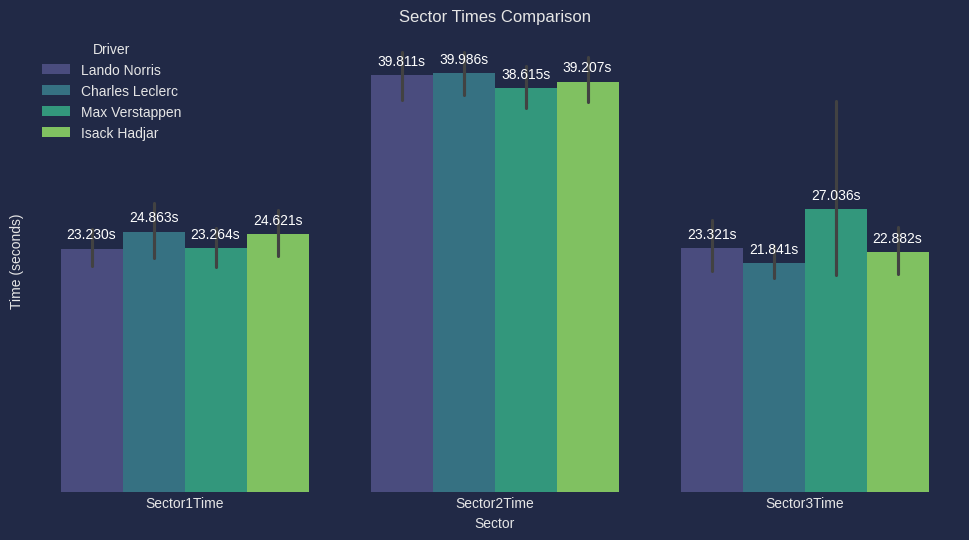

In [18]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

*Race*

In [4]:
race = f1.get_session(2025, "Monaco", "R")
race.load()

req         WARNING 	DEFAULT CACHE ENABLED! (1.33 GB) /home/sohamdesai/.cache/fastf1
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Cannot load lap times for first lap from Ergast. Timing data is not available for this session.
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for we

In [5]:
race.session_info

{'Meeting': {'Key': 1261,
  'Name': 'Monaco Grand Prix',
  'OfficialName': 'FORMULA 1 TAG HEUER GRAND PRIX DE MONACO 2025',
  'Location': 'Monaco',
  'Number': 8,
  'Country': {'Key': 114, 'Code': 'MON', 'Name': 'Monaco'},
  'Circuit': {'Key': 22, 'ShortName': 'Monte Carlo'}},
 'SessionStatus': 'Inactive',
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9979,
 'Type': 'Race',
 'Name': 'Race',
 'StartDate': datetime.datetime(2025, 5, 25, 15, 0),
 'EndDate': datetime.datetime(2025, 5, 25, 17, 0),
 'GmtOffset': datetime.timedelta(seconds=7200),
 'Path': '2025/2025-05-25_Monaco_Grand_Prix/2025-05-25_Race/'}

In [6]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
4,NOR,McLaren,NaN,NaN,NaT,
16,LEC,Ferrari,NaN,NaN,NaT,
81,PIA,McLaren,NaN,NaN,NaT,
1,VER,Red Bull Racing,NaN,NaN,NaT,
6,HAD,Racing Bulls,NaN,NaN,NaT,
14,ALO,Aston Martin,NaN,NaN,NaT,
44,HAM,Ferrari,NaN,NaN,NaT,
31,OCO,Haas F1 Team,NaN,NaN,NaT,
30,LAW,Racing Bulls,NaN,NaN,NaT,
23,ALB,Williams,NaN,NaN,NaT,


In [7]:
race_laps = race.laps
race_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:36.137000,VER,1,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:38.394000,...,True,Red Bull Racing,0 days 00:56:08.809000,2025-05-25 13:03:09.195,12,4.0,False,,False,False
1,0 days 00:59:22.455000,VER,1,0 days 00:01:46.318000,2.0,1.0,NaT,NaT,0 days 00:00:34.949000,0 days 00:00:45.145000,...,True,Red Bull Racing,0 days 00:57:36.137000,2025-05-25 13:04:36.523,16,4.0,False,,False,False
2,0 days 01:01:11.270000,VER,1,0 days 00:01:48.815000,3.0,1.0,NaT,NaT,0 days 00:00:32.110000,0 days 00:00:47.430000,...,True,Red Bull Racing,0 days 00:59:22.455000,2025-05-25 13:06:22.841,6,4.0,False,,False,False
3,0 days 01:02:51.560000,VER,1,0 days 00:01:40.290000,4.0,1.0,NaT,NaT,0 days 00:00:31.006000,0 days 00:00:47.889000,...,True,Red Bull Racing,0 days 01:01:11.270000,2025-05-25 13:08:11.656,671,4.0,False,,False,False
4,0 days 01:04:12.360000,VER,1,0 days 00:01:20.800000,5.0,1.0,NaT,NaT,0 days 00:00:21.744000,0 days 00:00:37.485000,...,True,Red Bull Racing,0 days 01:02:51.560000,2025-05-25 13:09:51.946,1,4.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,0 days 02:32:33.910000,BEA,87,0 days 00:01:15.427000,72.0,3.0,NaT,NaT,0 days 00:00:19.724000,0 days 00:00:35.867000,...,True,Haas F1 Team,0 days 02:31:18.483000,2025-05-25 14:38:18.869,1,13.0,False,,False,True
1421,0 days 02:33:49.265000,BEA,87,0 days 00:01:15.355000,73.0,3.0,NaT,NaT,0 days 00:00:19.631000,0 days 00:00:35.894000,...,True,Haas F1 Team,0 days 02:32:33.910000,2025-05-25 14:39:34.296,1,12.0,False,,False,True
1422,0 days 02:35:04.630000,BEA,87,0 days 00:01:15.365000,74.0,3.0,NaT,NaT,0 days 00:00:19.528000,0 days 00:00:35.823000,...,True,Haas F1 Team,0 days 02:33:49.265000,2025-05-25 14:40:49.651,1,12.0,False,,False,True
1423,0 days 02:36:20.429000,BEA,87,0 days 00:01:15.799000,75.0,3.0,NaT,NaT,0 days 00:00:19.650000,0 days 00:00:36.177000,...,True,Haas F1 Team,0 days 02:35:04.630000,2025-05-25 14:42:05.016,1,12.0,False,,False,True


In [8]:
nor_race_laps = race.laps.pick_driver("NOR")
fastest_lap_nor_race = nor_race_laps.pick_fastest().LapTime
nor_race_lap_time = nor_race_laps["LapTime"]
nor_race_sec1 = nor_race_laps["Sector1Time"]
nor_race_sec2 = nor_race_laps["Sector2Time"]
nor_race_sec3 = nor_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_nor_race), "which was in Lap number" ,nor_race_laps.pick_fastest().LapNumber)
nor_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:13.221000 which was in Lap number 78.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
734,NaT,NaT,0 days 00:00:37.264000,0 days 00:00:21.219000,189.0,176.0,252.0,267.0
735,0 days 00:01:44.634000,0 days 00:00:34.072000,0 days 00:00:44.185000,0 days 00:00:26.377000,97.0,144.0,136.0,252.0
736,0 days 00:01:49.015000,0 days 00:00:30.118000,0 days 00:00:49.715000,0 days 00:00:29.182000,147.0,173.0,213.0,250.0
737,0 days 00:01:41.564000,0 days 00:00:31.321000,0 days 00:00:47.988000,0 days 00:00:22.255000,141.0,121.0,253.0,248.0
738,0 days 00:01:18.050000,0 days 00:00:20.559000,0 days 00:00:36.559000,0 days 00:00:20.932000,200.0,180.0,254.0,272.0


In [9]:
fastest_lap_nor_race = nor_race_laps.pick_fastest()
tele_nor_race = fastest_lap_nor_race.get_telemetry().add_distance()
speed_nor_race = tele_nor_race.Speed
tele_nor_race.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,269,7,10735
3,270,7,10776
4,271,7,10818
5,271,7,10902
6,271,7,10987
...,...,...,...
542,260,6,10832
543,261,6,10768
544,263,6,10704
545,265,7,10640


In [10]:
lec_race_laps = race.laps.pick_driver("LEC")
fastest_lap_lec_race = lec_race_laps.pick_fastest().LapTime
lec_race_lap_time = lec_race_laps["LapTime"]
lec_race_sec1 = lec_race_laps["Sector1Time"]
lec_race_sec2 = lec_race_laps["Sector2Time"]
lec_race_sec3 = lec_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_lec_race), "which was in Lap number" ,lec_race_laps.pick_fastest().LapNumber)
lec_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:14.055000 which was in Lap number 36.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
198,NaT,NaT,0 days 00:00:37.212000,0 days 00:00:21.765000,187.0,181.0,253.0,269.0
199,0 days 00:01:44.769000,0 days 00:00:34.191000,0 days 00:00:44.995000,0 days 00:00:25.583000,111.0,174.0,157.0,236.0
200,0 days 00:01:48.805000,0 days 00:00:31.019000,0 days 00:00:49.594000,0 days 00:00:28.192000,156.0,152.0,202.0,238.0
201,0 days 00:01:41.248000,0 days 00:00:31.076000,0 days 00:00:48.358000,0 days 00:00:21.814000,148.0,99.0,262.0,239.0
202,0 days 00:01:18.801000,0 days 00:00:20.597000,0 days 00:00:37.317000,0 days 00:00:20.887000,196.0,186.0,254.0,273.0


In [11]:
fastest_lap_lec_race = lec_race_laps.pick_fastest()
tele_lec_race = fastest_lap_lec_race.get_telemetry().add_distance()
speed_lec_race = tele_lec_race.Speed
tele_lec_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,264,7,10625
3,265,7,10669
4,267,7,10758
5,269,7,10834
6,272,7,10911
...,...,...,...
541,261,6,11120
542,261,6,10933
543,262,7,10747
544,264,7,10708


In [12]:
ver_race_laps = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race_laps.pick_fastest().LapTime
ver_race_lap_time = ver_race_laps["LapTime"]
ver_race_sec1 = ver_race_laps["Sector1Time"]
ver_race_sec2 = ver_race_laps["Sector2Time"]
ver_race_sec3 = ver_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_race), "which was in Lap number" ,ver_race_laps.pick_fastest().LapNumber)
ver_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:14.230000 which was in Lap number 45.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:38.394000,0 days 00:00:21.759000,170.0,178.0,253.0,258.0
1,0 days 00:01:46.318000,0 days 00:00:34.949000,0 days 00:00:45.145000,0 days 00:00:26.224000,83.0,167.0,229.0,254.0
2,0 days 00:01:48.815000,0 days 00:00:32.110000,0 days 00:00:47.430000,0 days 00:00:29.275000,159.0,100.0,226.0,257.0
3,0 days 00:01:40.290000,0 days 00:00:31.006000,0 days 00:00:47.889000,0 days 00:00:21.395000,136.0,170.0,262.0,253.0
4,0 days 00:01:20.800000,0 days 00:00:21.744000,0 days 00:00:37.485000,0 days 00:00:21.571000,177.0,173.0,254.0,262.0


In [13]:
fastest_lap_ver_race = ver_race_laps.pick_fastest()
tele_ver_race = fastest_lap_ver_race.get_telemetry().add_distance()
speed_ver_race = tele_ver_race.Speed
tele_ver_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,265,6,11323
3,266,6,11105
4,268,6,10668
5,269,6,10711
6,271,7,10754
...,...,...,...
554,258,6,11567
555,260,6,11634
556,262,6,11720
557,264,6,11806


In [14]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_race_sec1),
        "Sector1Time": nor_race_sec1,
        "Sector2Time": nor_race_sec2,
        "Sector3Time": nor_race_sec3,
        "Lap Time": nor_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_race_sec1),
        "Sector1Time": lec_race_sec1,
        "Sector2Time": lec_race_sec2,
        "Sector3Time": lec_race_sec3,
        "Lap Time": lec_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Lando Norris,0 days 00:00:34.072000,0 days 00:00:44.185000,0 days 00:00:26.377000,0 days 00:01:44.634000
2,Lando Norris,0 days 00:00:30.118000,0 days 00:00:49.715000,0 days 00:00:29.182000,0 days 00:01:49.015000
3,Lando Norris,0 days 00:00:31.321000,0 days 00:00:47.988000,0 days 00:00:22.255000,0 days 00:01:41.564000
4,Lando Norris,0 days 00:00:20.559000,0 days 00:00:36.559000,0 days 00:00:20.932000,0 days 00:01:18.050000
5,Lando Norris,0 days 00:00:20.643000,0 days 00:00:37.367000,0 days 00:00:21.162000,0 days 00:01:19.172000
...,...,...,...,...,...
229,Max Verstappen,0 days 00:00:20.007000,0 days 00:00:36.387000,0 days 00:00:19.955000,0 days 00:01:16.349000
230,Max Verstappen,0 days 00:00:19.870000,0 days 00:00:36.434000,0 days 00:00:20.040000,0 days 00:01:16.344000
231,Max Verstappen,0 days 00:00:19.865000,0 days 00:00:36.470000,0 days 00:00:20.133000,0 days 00:01:16.468000
232,Max Verstappen,0 days 00:00:19.910000,0 days 00:00:36.656000,0 days 00:00:36.766000,0 days 00:01:33.332000


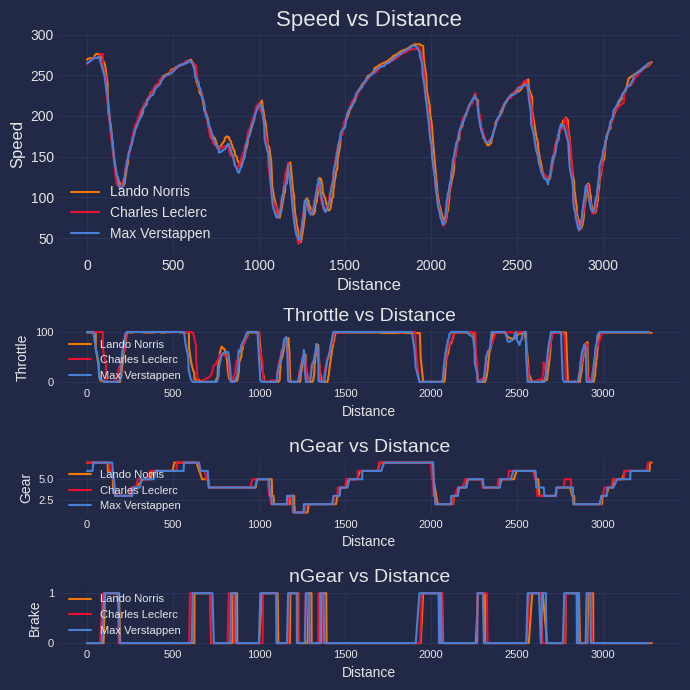

In [15]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = race.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_nor_race.Distance, tele_nor_race.Speed, label="Lando Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_lec_race.Distance, tele_lec_race.Speed, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[0].plot(
    tele_ver_race.Distance, tele_ver_race.Speed, label="Max Verstappen", color=get_driver_color("VER")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_nor_race.Distance, tele_nor_race.Throttle, label="Lando Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_lec_race.Distance, tele_lec_race.Throttle, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[1].plot(
    tele_ver_race.Distance, tele_ver_race.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_nor_race.Distance, tele_nor_race.nGear, label="Lando Norris", color=get_driver_color("NOR")
)
ax[2].plot(
    tele_lec_race.Distance, tele_lec_race.nGear, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[2].plot(
    tele_ver_race.Distance, tele_ver_race.nGear, label="Max Verstappen", color=get_driver_color("VER")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_nor_race.Distance, tele_nor_race.Brake, label="Lando Norris", color=get_driver_color("NOR")
)
ax[3].plot(
    tele_lec_race.Distance, tele_lec_race.Brake, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[3].plot(
    tele_ver_race.Distance, tele_ver_race.Brake, label="Max Verstappen", color=get_driver_color("VER")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [16]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_race_sec1),
        "Sector1Time": nor_race_sec1,
        "Sector2Time": nor_race_sec2,
        "Sector3Time": nor_race_sec3,
        "Lap Time": nor_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_race_sec1),
        "Sector1Time": lec_race_sec1,
        "Sector2Time": lec_race_sec2,
        "Sector3Time": lec_race_sec3,
        "Lap Time": lec_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Lando Norris,0 days 00:00:34.072000,0 days 00:00:44.185000,0 days 00:00:26.377000,0 days 00:01:44.634000
2,Lando Norris,0 days 00:00:30.118000,0 days 00:00:49.715000,0 days 00:00:29.182000,0 days 00:01:49.015000
3,Lando Norris,0 days 00:00:31.321000,0 days 00:00:47.988000,0 days 00:00:22.255000,0 days 00:01:41.564000
4,Lando Norris,0 days 00:00:20.559000,0 days 00:00:36.559000,0 days 00:00:20.932000,0 days 00:01:18.050000
5,Lando Norris,0 days 00:00:20.643000,0 days 00:00:37.367000,0 days 00:00:21.162000,0 days 00:01:19.172000
...,...,...,...,...,...
229,Max Verstappen,0 days 00:00:20.007000,0 days 00:00:36.387000,0 days 00:00:19.955000,0 days 00:01:16.349000
230,Max Verstappen,0 days 00:00:19.870000,0 days 00:00:36.434000,0 days 00:00:20.040000,0 days 00:01:16.344000
231,Max Verstappen,0 days 00:00:19.865000,0 days 00:00:36.470000,0 days 00:00:20.133000,0 days 00:01:16.468000
232,Max Verstappen,0 days 00:00:19.910000,0 days 00:00:36.656000,0 days 00:00:36.766000,0 days 00:01:33.332000


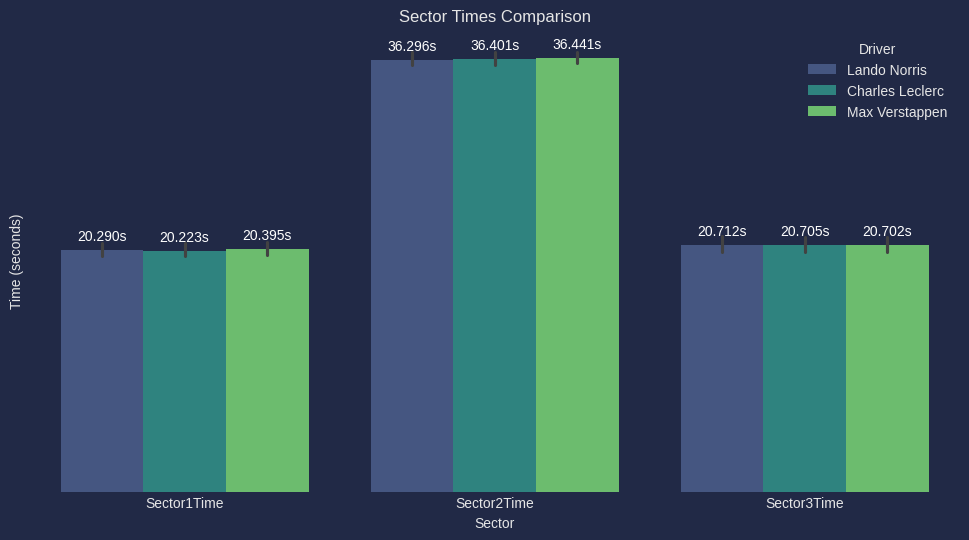

In [17]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

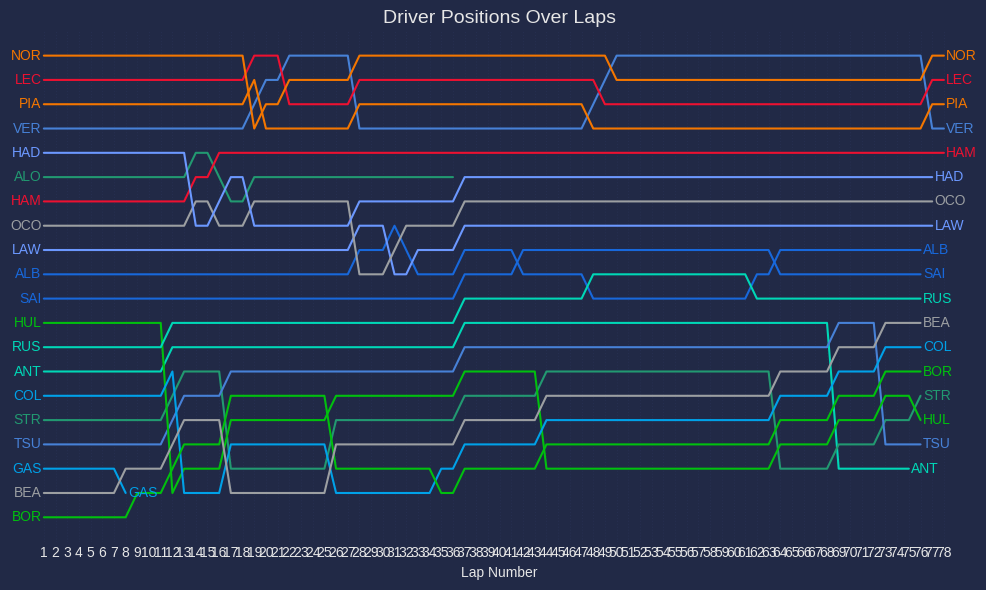

In [18]:
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

team_colors = {}

for driver in drivers_ab:
    driver_object = race.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

plt.figure(figsize=(10, 6))
for driver in drivers_ab:
    positions = race_laps[race_laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    plt.text(
        1 - 0.2,
        positions[0],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='right'
    )
    
    plt.text(
        len(positions) + 0.2,
        positions[-1],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left'
    )

plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

In [ ]:
def getDriverPosition(abbreviation: str):
    res = race.results
    abbr = res["Abbreviation"] == abbreviation
    pos = res.loc[abbr, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "#000000")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()

In [20]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/tmp/ipykernel_21411/905247657.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
5,ALO,278.0
10,SAI,281.0
9,ALB,282.0
15,BOR,282.0
14,ANT,283.0
17,COL,283.0
4,HAD,284.0
3,VER,284.0
13,RUS,284.0
11,TSU,284.0


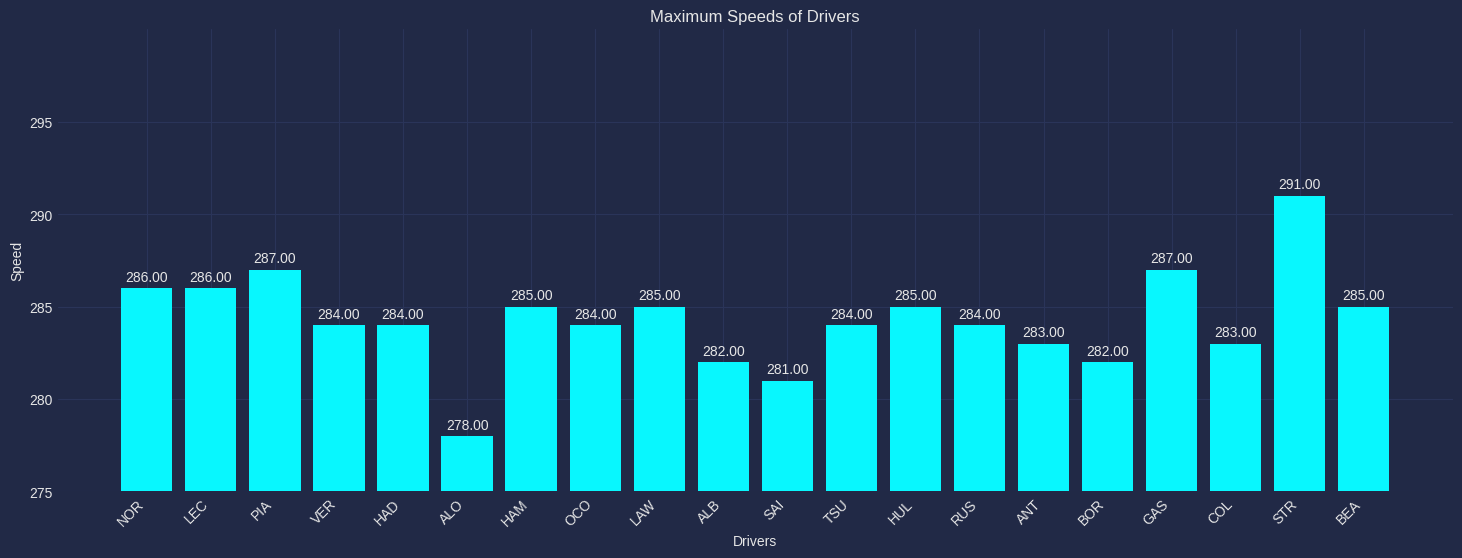

In [21]:
fig,ax = plt.subplots(figsize=(18, 6))
bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])
ax.set_xlabel('Drivers')
ax.set_ylabel('Speed')
ax.set_title('Maximum Speeds of Drivers')
plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

In [22]:
plotting.setup_mpl()

/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [24]:
laps_ver = race_laps.pick_driver("VER")
laps_nor = race_laps.pick_driver("NOR")

fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_nor = laps_nor.pick_fastest().get_telemetry().add_distance()

fastest_ver["Driver"] = "VER"
fastest_nor["Driver"] = "NOR"
telemetry = pd.concat([fastest_ver,fastest_nor])

/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [25]:
num_minisectors = 25
total_distance = total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors
minisectors = [0]
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [26]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,NOR,262.125000
1,1,VER,256.307692
2,2,NOR,138.620690
3,2,VER,137.741935
4,3,NOR,206.714286
5,3,VER,203.312500
6,4,NOR,249.000000
7,4,VER,247.400000
8,5,NOR,258.062500
9,5,VER,259.400000


In [27]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [28]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

telemetry = telemetry.sort_values(by=['Distance'])

telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'NOR', 'Fastest_driver_int'] = 2

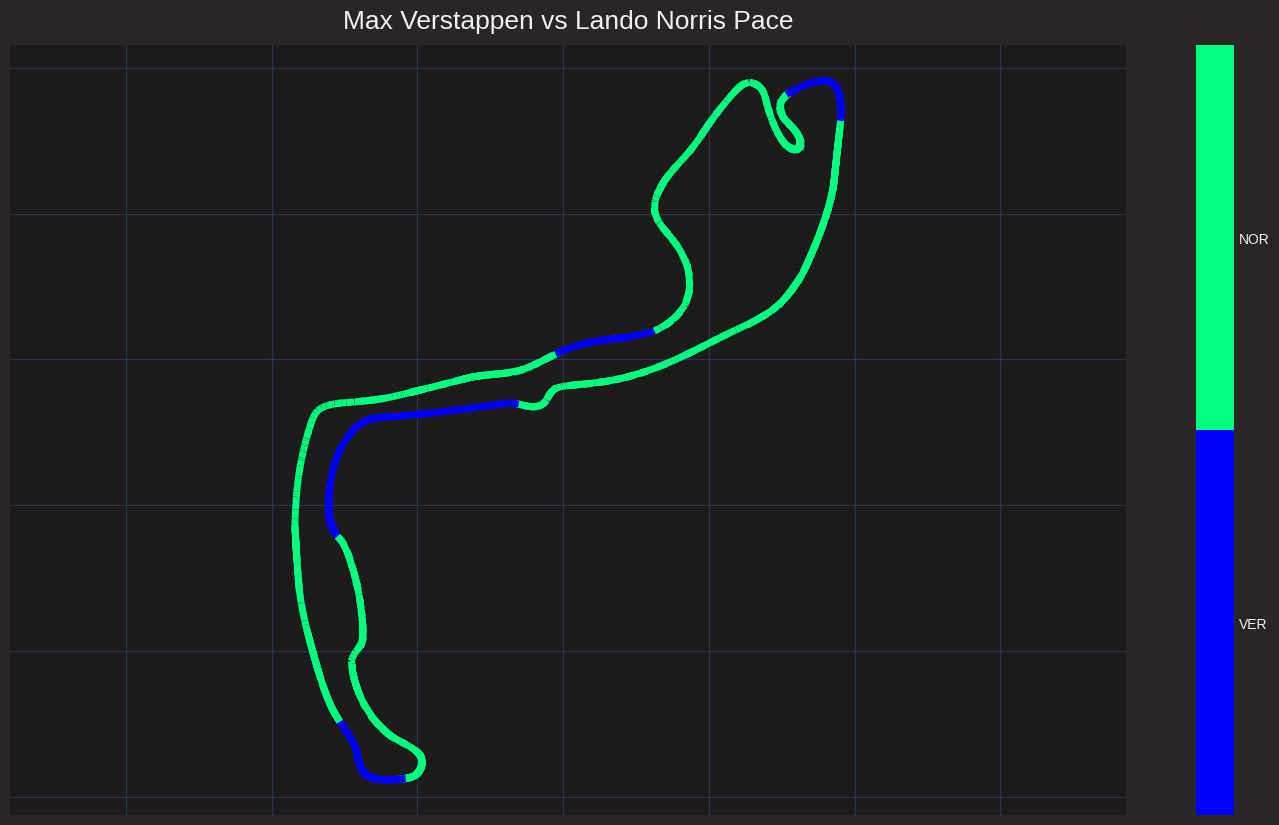

In [29]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['VER', 'NOR'])
plt.title("Max Verstappen vs Lando Norris Pace")
plt.show()
